# 2 - WeatherFile Creation - SAM format to TMY3 format

bifacial_radiance worked originally with TMY3 data format 

In [13]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import bifacial_radiance
bifacial_radiance.__version__

'0.4.2+148.gdb91364.dirty'

In [14]:
from datetime import date

today = date.today()
print("Last run:", today)

Last run: 2023-04-10


In [15]:
testfolder = testfolder = str(Path().resolve().parent.parent / 'bifacial_radiance' / 'SouthPole')
if not os.path.exists(testfolder):
    os.makedirs(testfolder)


# Weather File modification

In [18]:
def convertTMYtoSAM(data, savefile='Bifacial_SAMfileAll2019_15.csv', includeminute = True):
    """
    Saves a dataframe with weather data from SRRL on SAM-friendly format.

    INPUT:
    data
    savefile
    includeminute  -- especially for hourly data, if SAM input does not have Minutes, it assuems it's TMY3 format and 
                      calculates the sun position 30 minutes prior to the hour (i.e. 12 timestamp means sun position at 11:30)
                      If minutes are included, it will calculate the sun position at the time of the timestamp (12:00 at 12:00)
                      Include minutes if resolution of data is not hourly duh. (but it will calculate at the timestamp)
                      
    Headers expected by SAM:
    ************************* 
    # Source	Location ID	City	State	Country	Latitude	Longitude	Time Zone	Elevation		

    Column names
    *************
    # Year	Month	Day	Hour	Minute	Wspd	Tdry	DHI	DNI	GHI	Albedo

    OR
    # Year	Month	Day	Hour	Wspd	Tdry	DHI	DNI	GHI	Albedo

    """

    import pandas as pd

    header = "Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,,,,,,,,,,\n" + \
            "Measured,99999,Antartica,SP,World,-0, -89.99,-0,2.3,,,,,,,,,,\n"

    if includeminute:
        savedata = pd.DataFrame({'Year':data.index.year, 'Month':data.index.month, 'data':srrl15.index.day,
                                 'Hour':data.index.hour, 'Minute':data.index.minute,
                                 'Wspd':data['Avg Wind Speed @ 6ft [m/s]'],
                                 'Tdry':data['Tower Dry Bulb Temp [deg C]'],
                                 'DHI':data['Diffuse 8-48 (vent) [W/m^2]'],
                                 'DNI':data['Direct CHP1-1 [W/m^2]'],
                                 'GHI':data['Global CMP22 (vent/cor) [W/m^2]'],
                                 'Albedo':data['Albedo (CMP11)']
                                 })
    else:
         savedata = pd.DataFrame({'Year':data.index.year, 'Month':data.index.month, 'Day':data.index.day,
                                 'Hour':data.index.hour,
                                 'Wspd':data['Avg Wind Speed @ 6ft [m/s]'],
                                 'Tdry':data['Tower Dry Bulb Temp [deg C]'],
                                 'DHI':data['Diffuse 8-48 (vent) [W/m^2]'],
                                 'DNI':data['Direct CHP1-1 [W/m^2]'],
                                 'GHI':data['Global CMP22 (vent/cor) [W/m^2]'],
                                 'Albedo':data['Albedo (CMP11)']
                                 })
    with open(savefile, 'w', newline='') as ict:
        # Write the header lines, including the index variable for
        # the last one if you're letting Pandas produce that for you.
        # (see above).
        for line in header:
            ict.write(line)

        savedata.to_csv(ict, index=False)

      

def new_save_TMY3(srrl15, savefile='Bifacial_TMYfileAll2019_15.csv', includeTrackerData=False):
    """
    NEW Routine to save TMY3 , assuming the columns Date and Time already exist and are in the right
    1-24 hour format. (this can be done previous to submitting to this function by
    reading a real CSV and joining those columns)
    
    Saves a dataframe with weathe data from SRRL in TMY3 data format.
    
    if includeTrackerData is True, it will also save the tracker data column.
    

    Headers expected by TMY3:
    ************************* 
    # Location ID	City	State	Time Zone	Latitude	Longitude	Elevation

    Column names
    *************
    # Date (MM/DD/YYYY)		Time (HH:MM)	GHI (W/m^2))	DNI (W/m^2))	DHI (W/m^2)		Wspd (m/s)	
    Dry-bulb (C)	Alb (unitless)	

    """

    import pandas as pd

    header = "724666, ANTARCTICA, SP, -0, -89.99,50.0, 2.3\n"

    savedata = pd.DataFrame({'Date (MM/DD/YYYY)':srrl15['Date (MM/DD/YYYY)'],
                             'Time (HH:MM)':srrl15['Time (HH:MM)'],
                             'Wspd (m/s)':srrl15['windspeed'],
                             'Dry-bulb (C)':srrl15['Tamb'],
                             'DHI (W/m^2)':srrl15['DHI'],
                             'DNI (W/m^2)':srrl15['DNI'],
                             'GHI (W/m^2)':srrl15['GHI'],
                             'Alb (unitless)':srrl15['albedo']})

    if includeTrackerData:
        savedata['Tracker Angle (degrees)'] = srrl15['Tracker Angle (degrees)']

    with open(savefile, 'w', newline='') as ict:
        # Write the header lines, including the index variable for
        # the last one if you're letting Pandas produce that for you.
        # (see above).
        for line in header:
            ict.write(line)

        savedata.to_csv(ict, index=False)

In [5]:
real_tmy=r'C:\Users\sayala\Documents\Github\bifacialvf\bifacialvf\data\724010TYA.CSV'
real_tmy = pd.read_csv(real_tmy, skiprows = [0])
real_tmy = real_tmy.reset_index()
real_tmy.head(2)

,index,Date (MM/DD/YYYY),Time (HH:MM),ETR (W/m^2),ETRN (W/m^2),GHI (W/m^2),GHI source,GHI uncert (%),DNI (W/m^2),DNI source,...,Alb (unitless),Alb source,Alb uncert (code),Lprecip depth (mm),Lprecip quantity (hr),Lprecip source,Lprecip uncert (code),PresWth (METAR code),PresWth source,PresWth uncert (code)
0,0,01/01/1987,01:00,0,0,0,1,0,0,1,...,0.0,?,0,0,1,D,9,0,C,8
1,1,01/01/1987,02:00,0,0,0,1,0,0,1,...,0.0,?,0,0,1,D,9,0,C,8


In [20]:
rawfile = r'South_Pole.xlsx'
data = pd.read_excel(rawfile)
data.head(2)

,datetime,DNI,DHI,GHI,windir,windspeed,rel_hum,albedo
0,2021-01-01 00:00:00,1046.269492,74.516949,466.494915,74.247458,2.508475,65.571186,0.837950
1,2021-01-01 01:00:00,1042.085000,74.356667,467.708333,74.088333,2.711667,65.161667,0.845178


In [21]:
data['Date (MM/DD/YYYY)'] = real_tmy['Date (MM/DD/YYYY)']
data['Time (HH:MM)'] = real_tmy['Time (HH:MM)']
data['Date (MM/DD/YYYY)']=data['Date (MM/DD/YYYY)'].map(lambda x: str(x)[:-4])+'2021'
data['Tamb'] = 0
data.head(2)

,datetime,DNI,DHI,GHI,windir,windspeed,rel_hum,albedo,Date (MM/DD/YYYY),Time (HH:MM),Tamb
0,2021-01-01 00:00:00,1046.269492,74.516949,466.494915,74.247458,2.508475,65.571186,0.837950,01/01/2021,01:00,0
1,2021-01-01 01:00:00,1042.085000,74.356667,467.708333,74.088333,2.711667,65.161667,0.845178,01/01/2021,02:00,0


In [22]:
data.set_index(data['datetime'], inplace=True)

In [23]:
data.set_index(data['datetime'], inplace=True)

In [24]:
import matplotlib.pyplot as plt

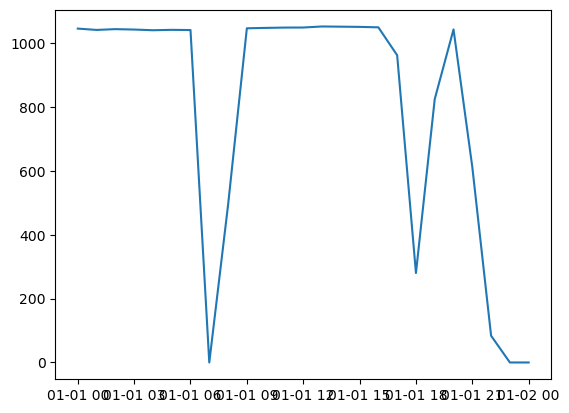

In [25]:
plt.plot(data.loc['2021-01-01 00:00:00':'2021-01-02 00:00:00']['DNI'])

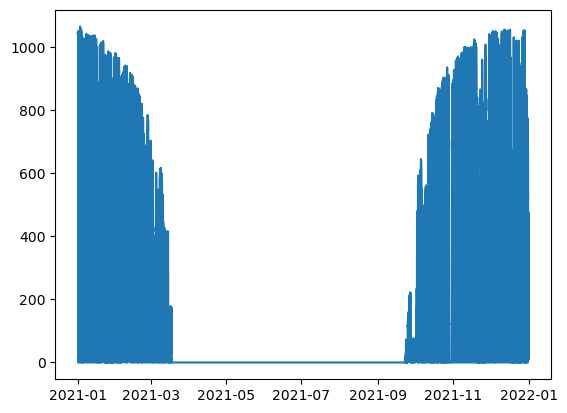

In [26]:
foo = data.loc
plt.plot(data['DNI'])

In [27]:
new_save_TMY3(data, savefile=r'SoutPole_TMY3.csv')